# BTS 자료분석
> Best Trip Service
> (원자료) 국민여행조사_국내여행

- 이전 원자료 수정 작업
- 결측치가 많은정보 제거 (2일차 이후의 여행정보 제거)
- 해석하기 어려운 데이터 제거 (여행자의 올해 여행 정보)
- 불필요한 데이터 제거 (여행을 가지 않은 이유)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rhkdg\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [3]:
data = pd.read_csv('(원자료) 2020년 국민여행조사_국내여행.csv',index_col='ID')


In [4]:
#data

In [5]:
d11 = data['A11']>4
d12 = data['A12']>4
d13 = data['A13']>4

data['total'] = d11 + d12 +d13
data['total'] = data['total'].map({True:1,False:0})

data.drop(['A11'], axis=1, inplace= True)
data.drop(['A12'], axis=1, inplace= True)
data.drop(['A13'], axis=1, inplace= True)
data.drop(['BARA'],axis=1, inplace= True)

data.drop(['WT_DOM'],axis=1, inplace=True)

C:\Users\rhkdg\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:205: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [6]:
data = data[data['D_TRA1_CHECK']=='Y']
data = data[data['D_TRA1_CASE']==1]

In [7]:
spot = data['D_TRA1_1_SPOT']

In [8]:
data.shape

(10638, 247)

# 결측치 처리

In [9]:
all_na = (data.isnull().sum() / len(data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})

Text(0.5, 1.0, 'Percent missing data by feature')

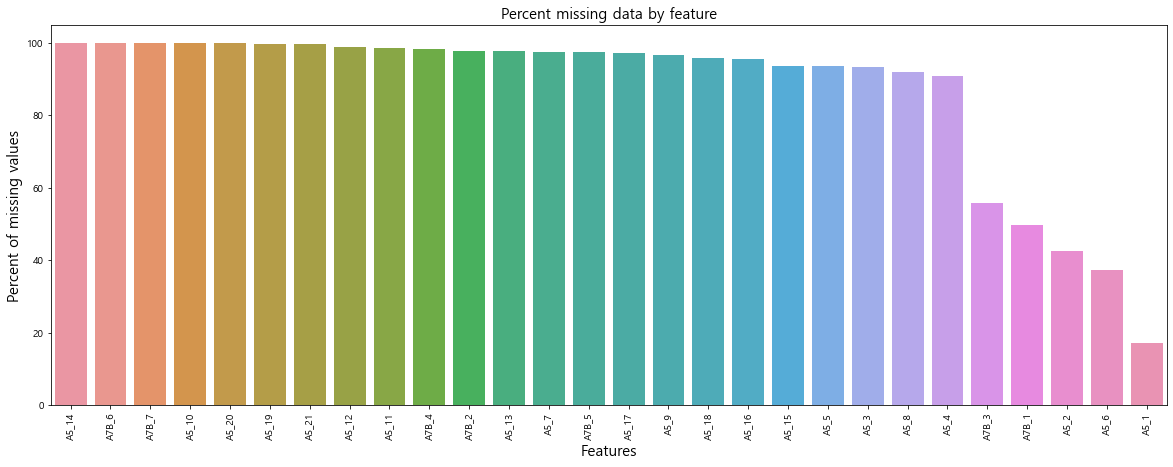

In [10]:
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [11]:
# 여행활동 이진 변수로 변경
for i in range(21):
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].fillna(0)
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].map({i+1:1,0:0})
# 여행 동반자 유형
for i in range(7):
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].fillna(0)
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].map({i+1:1,0:0})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10638 entries, 11080760641_204453 to 3902057133A_260717
Columns: 247 entries, D_TRA1_CHECK to total
dtypes: float64(16), int64(230), object(1)
memory usage: 20.1+ MB


In [13]:
data

,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,BAGE,SAGE,BJOB,BINC1,BINC2,BEDU,BMAR,BFAM,BMON,total
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,Y,1.0,8.0,9.0,8.0,9.0,0.0,40000.0,1.0,40000.0,...,4,45,1,5,3,3,2,3,8,0
21110610901_148196,Y,1.0,6.0,22.0,6.0,23.0,1.0,90000.0,1.0,90000.0,...,2,25,1,2,2,4,1,1,6,0
2231011065A_7203,Y,1.0,1.0,17.0,1.0,17.0,0.0,90000.0,3.0,30000.0,...,5,53,11,5,1,3,2,3,1,0
2302055001A_181404,Y,1.0,7.0,25.0,7.0,25.0,0.0,21000.0,2.0,22000.0,...,3,35,1,4,4,4,2,2,7,0
2305060097A_38902,Y,1.0,2.0,29.0,2.0,29.0,0.0,40000.0,2.0,20000.0,...,1,19,12,7,1,3,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,Y,1.0,4.0,18.0,4.0,18.0,0.0,150000.0,4.0,37500.0,...,3,38,1,5,5,4,2,3,4,1
3901054306A_172336,Y,1.0,6.0,28.0,6.0,28.0,0.0,30000.0,2.0,15000.0,...,3,35,1,6,3,4,2,2,6,1
39010631871_142345,Y,1.0,2.0,21.0,2.0,21.0,0.0,20000.0,1.0,20000.0,...,4,41,1,4,3,4,2,3,2,1


# 변수 분류

In [14]:
for i in data:
    print(f'"{i}",')

"D_TRA1_CHECK",
"D_TRA1_CASE",
"D_TRA1_SMONTH",
"D_TRA1_SDAY",
"D_TRA1_EMONTH",
"D_TRA1_EDAY",
"D_TRA1_S_Day",
"D_TRA1_COST",
"D_TRA1_NUM",
"D_TRA1_ONE_COST",
"D_TRA1_1_SPOT",
"A1_1",
"A4_1",
"A5_1",
"A5_2",
"A5_3",
"A5_4",
"A5_5",
"A5_6",
"A5_7",
"A5_8",
"A5_9",
"A5_10",
"A5_11",
"A5_12",
"A5_13",
"A5_14",
"A5_15",
"A5_16",
"A5_17",
"A5_18",
"A5_19",
"A5_20",
"A5_21",
"A7",
"A7B_1",
"A7B_2",
"A7B_3",
"A7B_4",
"A7B_5",
"A7B_6",
"A7B_7",
"A8_1",
"PA8_1",
"NA8_1",
"A8_2",
"PA8_2",
"NA8_2",
"A8_3",
"PA8_3",
"NA8_3",
"A8_4",
"PA8_4",
"NA8_4",
"A8_5",
"PA8_5",
"NA8_5",
"A8_6",
"PA8_6",
"NA8_6",
"A8_7",
"PA8_7",
"NA8_7",
"A8_8",
"PA8_8",
"NA8_8",
"A8_9",
"PA8_9",
"NA8_9",
"A8_10",
"PA8_10",
"NA8_10",
"A8_TOTAL",
"PA8_TOTAL",
"NA8_TOTAL",
"A9A",
"PA9A",
"NA9A",
"A9A_1",
"PA9A_1",
"NA9A_1",
"A9A_2",
"PA9A_2",
"NA9A_2",
"A9B",
"PA9B",
"NA9B",
"A9C",
"PA9C",
"NA9C",
"A9C_1",
"PA9C_1",
"NA9C_1",
"A9C_2",
"PA9C_2",
"NA9C_2",
"A9C_3",
"PA9C_3",
"NA9C_3",
"A9C_4",
"PA9C_4",
"NA9C_4",
"A9C_5",
"PA9C_

In [15]:
numeric = [
    "D_TRA1_COST","D_TRA1_NUM","D_TRA1_ONE_COST","A7", "A8_1", "PA8_1",
    "NA8_1", "A8_2", "PA8_2", "NA8_2", "A8_3", "PA8_3", "NA8_3",
    "A8_4", "PA8_4", "NA8_4", "A8_5", "PA8_5", "NA8_5", "A8_6", "PA8_6",
    "NA8_6", "A8_7", "PA8_7", "NA8_7", "A8_8", "PA8_8", "NA8_8", "A8_9",
    "PA8_9", "NA8_9", "A8_10", "PA8_10", "NA8_10", "A8_TOTAL", "PA8_TOTAL", 
    "NA8_TOTAL", "A9A", "PA9A", "NA9A", "A9A_1","PA9A_1", "NA9A_1", "A9A_2",
    "PA9A_2", "NA9A_2", "A9B", "PA9B", "NA9B", "A9C", "PA9C", "NA9C", 
    "A9C_1", "PA9C_1", "NA9C_1", "A9C_2", "PA9C_2", "NA9C_2", "A9C_3", 
    "PA9C_3", "NA9C_3", "A9C_4", "PA9C_4", "NA9C_4", "A9C_5", "PA9C_5",
    "NA9C_5", "A9C_6", "PA9C_6", "NA9C_6", "A9C_7", "PA9C_7", "NA9C_7",
    "A9C_8", "PA9C_8", "NA9C_8", "A9C_9", "PA9C_9", "NA9C_9", "A9C_10",
    "PA9C_10", "NA9C_10", "A9C_11", "PA9C_11", "NA9C_11", "A9C_12", 
    "PA9C_12", "NA9C_12", "A9C_13", "PA9C_13", "NA9C_13", "A9C_14", 
    "PA9C_14", "NA9C_14", "A9D", "PA9D", "NA9D", "A9D_1", "PA9D_1", 
    "NA9D_1", "A9D_2", "PA9D_2", "NA9D_2", "A9D_3", "PA9D_3", "NA9D_3",
    "A9E", "PA9E", "NA9E", "A9E_1", "PA9E_1", "NA9E_1", "A9E_2", "PA9E_2", 
    "NA9E_2", "A9E_3", "PA9E_3", "NA9E_3", "A9E_4", "PA9E_4", "NA9E_4",
    "A9E_5", "PA9E_5", "NA9E_5", "A9EA_1", "PA9EA_1", "NA9EA_1",
    "A9EA_2", "PA9EA_2", "NA9EA_2", "A9EA_3", "PA9EA_3", "NA9EA_3",
    "A9EA_4", "PA9EA_4", "NA9EA_4", "A9E_6", "PA9E_6", "NA9E_6", "A9F",
    "PA9F", "NA9F", "A9F_1", "PA9F_1", "NA9F_1", "A9F_2", "PA9F_2",
    "NA9F_2", "A9F_3", "PA9F_3", "NA9F_3", "A9F_4", "PA9F_4", "NA9F_4",
    "A9F_5", "PA9F_5", "NA9F_5", "A9G", "PA9G", "NA9G", "A9G_1", "PA9G_1",
    "NA9G_1", "A9G_2", "PA9G_2", "NA9G_2", "A9G_3", "PA9G_3", "NA9G_3", 
    "A9G_4", "PA9G_4","NA9G_4", "A9G_5", "PA9G_5", "NA9G_5", "A9G_6", 
    "PA9G_6", "NA9G_6", "A9H", "PA9H", "NA9H", "A9H_1", "PA9H_1", 
    "NA9H_1", "A9H_2", "PA9H_2", "NA9H_2", "A9H_3", "PA9H_3", "NA9H_3", 
    "A9I", "PA9I", "NA9I", "A9I_1", "PA9I_1", "NA9I_1", "A9", "NA9", 
]


In [16]:
nominal = [
    "D_TRA1_CHECK","D_TRA1_CASE","D_TRA1_SMONTH","D_TRA1_EMONTH", 
    "D_TRA1_EDAY", "D_TRA1_S_Day","D_TRA1_1_SPOT","A1_1", "A4_1", 
    "BSEX", "BAGE", "SAGE", "BJOB", "BINC1", "BINC2", "BEDU", 
    "BMAR", "BFAM", "BMON",
]
# 명목형 변수 인코딩
for col in nominal:
    data[col] = data[col].apply(str)

In [17]:
binary = [
    "A5_1", "A5_2", "A5_3", "A5_4", "A5_5", "A5_6", "A5_7", "A5_8",
    "A5_9", "A5_10", "A5_11", "A5_12", "A5_13", "A5_14", "A5_15",
    "A5_16", "A5_17","A5_18", "A5_19", "A5_20", "A5_21", "A7B_1",
    "A7B_2", "A7B_3", "A7B_4", "A7B_5", "A7B_6", "A7B_7",
]

Text(0, 0.5, 'count')

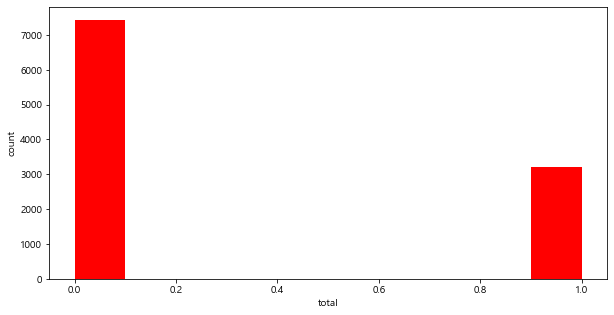

In [18]:
plt.figure(figsize=(10,5))
plt.hist(data['total'],color='red')
plt.xlabel('total')
plt.ylabel('count')

In [19]:
data.corr()['total'].sort_values().head(20)

A7B_3         -0.032198
PA9I_1        -0.021818
PA9I          -0.021818
NA9I_1        -0.019950
NA9I          -0.019950
A9I_1         -0.019313
A9I           -0.019313
PA9E_1        -0.017743
A9E_4         -0.017606
NA9E_4        -0.017515
NA9EA_4       -0.017048
PA9E_4        -0.016098
D_TRA1_NUM    -0.013279
NA9F_2        -0.012371
D_TRA1_SDAY   -0.012209
PA8_5         -0.010386
A9F_2         -0.009816
PA9G_3        -0.009619
A9H_2         -0.007444
NA9H_2        -0.007444
Name: total, dtype: float64

In [20]:
feature = []

연속형 변수
- 피어슨 상관 계수
연속형 변수 2개의 상관 관계를 확인하기 위한 가장 기본적인 방법이다.
정확히 말해서 두개의 수치값들의 집합이 있을 때 이 두개의 수치값들은 각각의 순서쌍에 대해서 연결관계가 있다고 할 때 두 수치값이 서로 관련이 있는지를 확인하는 방법이다.

흔한 예로 있는 것이 고등학생 한 학급에 50명이 있다고 할 때 이 학생들의 수학과목의 성적과 물리과목의 성정이 관련이 있는지 확인하는 것이 있다. 즉 수학과목과 물리과목은 서로 수리적 또는 과학적 능력과 관련이 있어 두 과목은 서로 관련이 있을 것이라는 가설을 어느 정도 두고 있으며 실제로 그런지 확인한다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://intothedata.com/02.scholar_category/statistics/correlation/

https://bskyvision.com/754

In [21]:
from scipy import stats
for i in numeric:
    corr, pval = stats.pearsonr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

D_TRA1_COST 9.474000129399422e-33
D_TRA1_ONE_COST 1.6933378081462536e-45
A7 0.046713725063188376
A8_1 6.3625383519931325e-24
PA8_1 1.3227982064693648e-23
NA8_1 3.180947814491293e-27
A8_2 0.009497048861115995
NA8_2 0.012856253465519524
A8_4 0.0001366325247469268
PA8_4 0.004026828217359787
NA8_4 0.0008369124931272836
A8_6 0.03945495384390545
NA8_6 0.02380959871044378
A8_7 4.268438247013523e-12
PA8_7 2.90551126891639e-12
NA8_7 1.4060472559165338e-11
A8_8 0.02144173331643295
PA8_8 0.0015086975033203767
A8_10 0.00022704136755277328
PA8_10 6.966517646099961e-05
A8_TOTAL 7.665793831334394e-30
PA8_TOTAL 2.627963648845388e-28
NA8_TOTAL 2.4170222046314834e-17
A9A 0.02198222386176641
PA9A 0.004406590059500539
NA9A 0.02347694864963393
A9A_1 0.044289527564622753
NA9A_1 0.028521563649267983
PA9A_2 0.01748755412374655
A9B 0.0002301343391731286
PA9B 0.004910946576987974
NA9B 0.002880780692860696
A9C 7.232062785479794e-32
PA9C 4.996446663251248e-34
NA9C 5.219307583573359e-35
A9C_1 1.4769145398459091e-0

C:\Users\rhkdg\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


A9D_3 8.96226615031343e-09
PA9D_3 0.00012645567809842415
NA9D_3 1.387212596440839e-08
A9E 3.987909491109973e-23
PA9E 5.788488253903527e-10
NA9E 1.5913108756397439e-27
A9E_2 4.2587808371242555e-11
PA9E_2 1.989302823807569e-10
NA9E_2 7.511533851191683e-18
A9E_5 3.2151951039653073e-35
PA9E_5 5.136034225827894e-09
NA9E_5 2.475628864806278e-25
A9EA_1 2.8228245719656337e-09
PA9EA_1 3.3764414512245033e-10
NA9EA_1 4.400378669911979e-08
A9EA_2 1.3791753910324103e-34
PA9EA_2 7.698874681554844e-05
NA9EA_2 3.2819922496502334e-24
A9EA_3 3.5710923413037326e-10
PA9EA_3 3.388689857013754e-08
NA9EA_3 2.23106287060772e-05
A9F 0.0023130460167501677
PA9F 3.5025075787137724e-15
NA9F 1.3867732635784535e-05
A9F_1 2.1278280151031942e-12
PA9F_1 1.865078607404283e-11
NA9F_1 2.1149863871427286e-12
A9F_4 4.916010391045886e-05
PA9F_4 1.2730571446373774e-09
NA9F_4 8.873423556195644e-05
A9G 1.9395346705159497e-21
PA9G 3.507304735595518e-08
NA9G 1.1801824083780759e-15
A9G_1 1.0244714858486564e-05
PA9G_1 0.00429726606

이진 변수
- 점 양분 상관 계수
한 변수는 있음/없음, 네/아니오 등으로 이분형(binary) 이고, 다른 한 변수는 연속형인 경우에도 상관계수를 구할 수 있습니다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://mansoostat.tistory.com/115

In [22]:
from scipy.stats import pointbiserialr
for i in binary:
    corr, pval = pointbiserialr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

A5_1 1.057237106327922e-11
A5_2 9.9742406536892e-13
A5_3 4.101765010210948e-06
A5_4 0.0017944288532242554
A5_5 1.7163740105565753e-09
A5_6 2.106229489038291e-06
A5_7 7.602318634340863e-05
A5_8 5.837559867238211e-11
A5_9 1.8738388466212786e-05
A5_11 0.00198598747834124
A5_15 2.724686219829359e-18
A7B_1 0.00010512246066139061
A7B_3 0.000895713806665898


명목형 변수 one-hot-encoding

In [23]:
nominal

obdata=pd.DataFrame()
for i in nominal:
    obdata[i]=data[i]

obdata = pd.get_dummies(obdata)

In [24]:
obfeature=[]
for i in obdata.dtypes.index:
    corr, pval = pointbiserialr(obdata[i],data['total'])
    if pval <0.05:
        print(i,pval)
        obfeature.append(i)

D_TRA1_SMONTH_11.0 0.01735733869767785
D_TRA1_SMONTH_12.0 0.0054730323478230205
D_TRA1_SMONTH_2.0 0.007648455664896542
D_TRA1_SMONTH_3.0 0.0018259433764854945
D_TRA1_SMONTH_5.0 0.015708811694387665
D_TRA1_SMONTH_7.0 0.0013022171121187323
D_TRA1_SMONTH_9.0 0.006696230149635847
D_TRA1_EMONTH_11.0 0.017185795421315785
D_TRA1_EMONTH_12.0 0.005780395472143677
D_TRA1_EMONTH_2.0 0.008529298225486101
D_TRA1_EMONTH_3.0 0.0018259433764854945
D_TRA1_EMONTH_5.0 0.014452485911991433
D_TRA1_EMONTH_7.0 0.0007168139363430157
D_TRA1_EMONTH_9.0 0.007015843333060279
D_TRA1_EDAY_11.0 0.005080760581567949
D_TRA1_EDAY_18.0 0.0012622173948728806
D_TRA1_EDAY_19.0 0.008238445360452627
D_TRA1_EDAY_2.0 0.016039965720289505
D_TRA1_EDAY_20.0 0.018217160152649067
D_TRA1_EDAY_26.0 0.03413640778362815
D_TRA1_EDAY_3.0 0.04748122978783938
D_TRA1_EDAY_30.0 0.00031130690892490617
D_TRA1_S_Day_0.0 3.877967828750545e-65
D_TRA1_S_Day_1.0 1.1255067631345631e-33
D_TRA1_S_Day_2.0 1.003667707798445e-18
D_TRA1_S_Day_3.0 0.000465

In [25]:
X=pd.DataFrame()
for i in feature:
    X[i] = data[i]
    
for i in obfeature:
    X[i] = obdata[i]
y = data['total']

In [26]:
X.index

Index(['11080760641_204453', '21110610901_148196', '2231011065A_7203',
       '2302055001A_181404', '2305060097A_38902', '2402069106A_324336',
       '25030560931_97381', '2504054317A_125174', '2504061032A_11754',
       '2504061032A_11785',
       ...
       '38360420481_344130', '38380360191_111885', '38390110071_141400',
       '3901052184A_142569', '3901052184A_56268', '3901053052A_112093',
       '3901054306A_172336', '39010631871_142345', '39020520031_345686',
       '3902057133A_260717'],
      dtype='object', name='ID', length=10638)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in X.dtypes.index:
    X[i] = scaler.fit_transform(pd.DataFrame(X[i]))

In [29]:
from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import StratifiedKFold

In [30]:
skf = StratifiedKFold(n_splits= 5 , shuffle= True, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
'''
Statsmodels 패키지는 검정 및 추정(test and estimation), 회귀분석(regression analysis), 
시계열 분석(time - series analysis) 등의 기능을 제공하는 파이썬 패키지이다.
'''

log_reg = LogisticRegression()

log_reg.fit(X, y)
# x2 = sm.add_constant(X)
# model = sm.OLS(y, x2)
# result = model.fit()
# print(result.summary())

print(f'score : {cross_val_score(log_reg, X, y, cv=skf).mean()}')

ImportError: cannot import name 'cached_data' from 'statsmodels.tools.decorators' (C:\Users\rhkdg\Anaconda3\lib\site-packages\statsmodels\tools\decorators.py)